In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import model_selection
import spacy

In [6]:
print(os.listdir())

['.ipynb_checkpoints', 'news', 'news.csv', 'news.zip', 'Untitled.ipynb']


In [7]:
df=pd.read_csv('C:/Users/Joshua Giwa/Desktop/New_Desktop/YEAR_Masters_Degree/PERSONAL MACHINE LEARNING PROJECTS/news.csv')

In [9]:
df.shape

(6335, 4)

###### checking for empty values

In [19]:
df.isna().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [23]:
# Create an NLP pipeline
nlp = spacy.load('en_core_web_md') #add mention to other languages

In [24]:
# let's call nlp.pipe on our dataset and convert the result to a list
#  this will be applied to to all the 'text' column of the dataframe.
from time import time
t_start= time()
df_processed = list(nlp.pipe(df['text'].iloc[:8000]))
print(f'Processing the entire cleaned data took {time()-t_start:.2f} seconds')



Processing the entire cleaned data took 976.73 seconds


In [27]:
# get the length of all processed documents in the whole cleaned dataset
df_docLength_to_be_visualized= []
for doc in df_processed:
      df_docLength_to_be_visualized.append(len(doc.text)) #doc.text contains the whole text of the original document

  #note that the df variable holds both the original text and the processed text. So when we use "doc.text", we access and retrieve the original text.


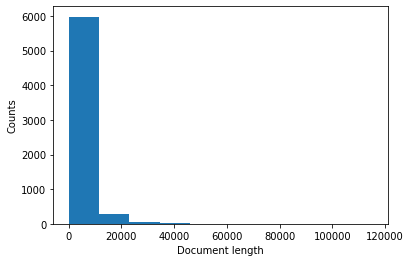

In [29]:
import matplotlib.pyplot as plt
# plot the distribution of lengths in an histogram
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.hist(df_docLength_to_be_visualized)
ax.set_xlabel('Document length')
_ =ax.set_ylabel('Counts')


In [31]:
# get the number of tokens in each document
df_docTokens_to_be_visualized= []
for doc in df_processed:
      df_docTokens_to_be_visualized.append(len(doc)) #the length of a spaCy document is the number of tokens

  #Here the len(doc) command accesses and retrieves the processed data (i.e. tokenized data) contained in the reduced_dataset_processed.



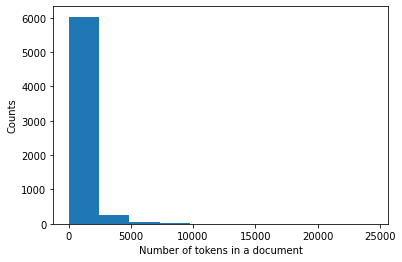

In [32]:
import matplotlib.pyplot as plt
# plot the distribution of lengths in an histogram
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.hist(df_docTokens_to_be_visualized)
ax.set_xlabel('Number of tokens in a document')
_ =ax.set_ylabel('Counts')


In [41]:
# let's cycle through the documents again, but this time we'll keep track of positive
# and negative reviews separately
real_label_to_be_visualized= []
fake_label_to_be_visualized= []
for i,doc in enumerate(df_processed):
    if df.iloc[i]['label']=='REAL':
        real_label_to_be_visualized.append(len(doc)) #the length of a spaCy document is the number of tokens
    elif df.iloc[i]['label']=='FAKE':
        fake_label_to_be_visualized.append(len(doc))


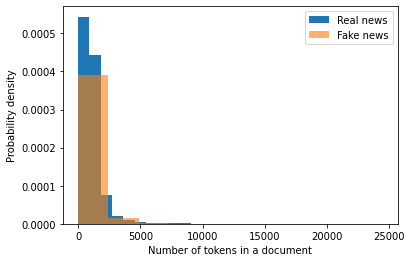

In [42]:
import matplotlib.pyplot as plt
# plot the distribution of lengths in an histogram
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.hist(real_label_to_be_visualized, density= True)
ax.hist(fake_label_to_be_visualized, alpha=0.6, density=True)
ax.set_xlabel('Number of tokens in a document')
_ =ax.set_ylabel('Probability density')
_= ax.legend(['Real news','Fake news'])


In [43]:
# import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# create a tokenizer that leaves documents already tokenized as they are:
def tokenize_as_is(x):
  ''' x is a list of tokens. It's returned as is'''
  return x

# define a function to get the most frequent ngrams
def get_top_ngram(spacy_tokenized_corpus, ngram_range=(1,2), top_n= 50):
    ''' By default it return the top 50 unigrams/bigrams'''
    vec = TfidfVectorizer(ngram_range=ngram_range, max_features=top_n, lowercase=False,
                          tokenizer=tokenize_as_is).fit(spacy_tokenized_corpus)
    # get a vector for each document
    bag_of_words = vec.transform(spacy_tokenized_corpus)
    # sum across documents
    sum_words = bag_of_words.sum(axis=0) 
    # get the words with their frequencies and order them
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return bag_of_words, words_freq#[:10]

In [44]:
df_processed_tokenized = []
for i,doc in enumerate(df_processed):
  # let's collect all valid tokens (i.e. no stop words, no punctuation) into a list
  df_processed_tokenized.append([token.lemma_ for token in doc if not (token.is_stop or token.is_punct)])

C:\Users\Joshua Giwa\AppData\Roaming\Python\Python38\site-packages\sklearn\feature_extraction\text.py:524: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


<AxesSubplot:>

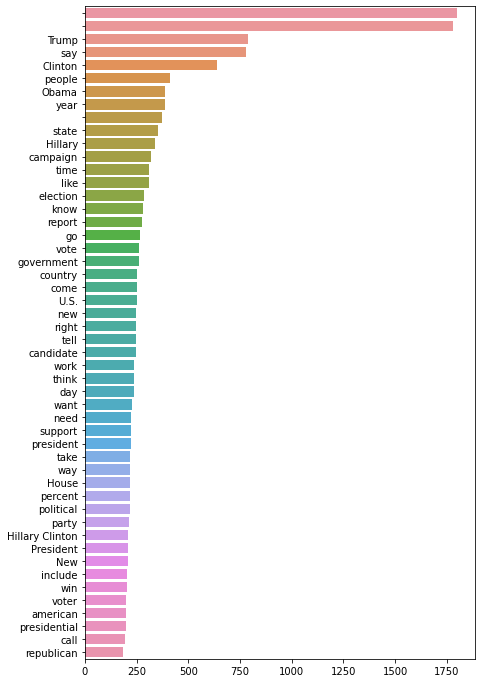

In [45]:
# let's get the words frequencies
bag_of_words, words_freq= get_top_ngram(df_processed_tokenized, ngram_range=(1,2), top_n= 50)

# let's plot them
import seaborn as sns
# separate the n_grams from their frequencies
ngram_labels = [word[0] for word in words_freq]
ngram_freqs = [word[1] for word in words_freq]
plt.figure(figsize=(7,12))
sns.barplot(x=ngram_freqs,y=ngram_labels)


In [48]:
words_freq[2]

('Trump', 787.6070180549301)

In [50]:
df_temp= df['text'].map(lambda x: x.replace('\n',''))

###### Next is to plot most common bigrams for real and fake news

C:\Users\Joshua Giwa\AppData\Roaming\Python\Python38\site-packages\sklearn\feature_extraction\text.py:524: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


<AxesSubplot:>

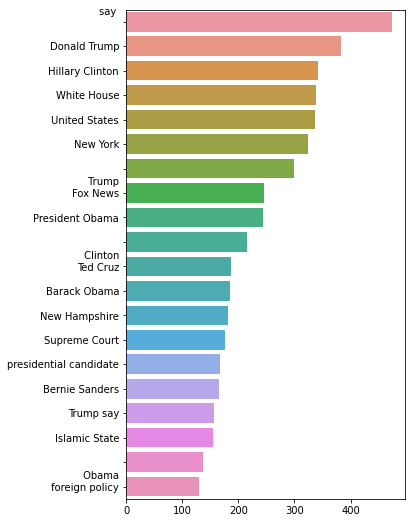

In [53]:
# Most common bigrams for real news
real_labels_tokenized= []
for i,doc in enumerate(df_processed):
    if df.iloc[i]['label']=='REAL':
    # let's collect all valid tokens (i.e. no stop words, no punctuation) into a list
     real_labels_tokenized.append([token.lemma_ for token in doc if not (token.is_stop or token.is_punct)])

_, real_bigram_freq= get_top_ngram(real_labels_tokenized, ngram_range=(2,2), top_n= 20)

# let's plot them
# separate the n_grams from their frequencies
# let's temporarily remove the spurious newline character since we know it's there (but let's make it obvious)
real_bigram_labels = [word[0].replace('\n\n\n\n','NEWLINE') for word in real_bigram_freq]
real_bigram_freqs = [word[1] for word in real_bigram_freq]
plt.figure(figsize=(5,9))
sns.barplot(x=real_bigram_freqs,y=real_bigram_labels)


C:\Users\Joshua Giwa\AppData\Roaming\Python\Python38\site-packages\sklearn\feature_extraction\text.py:524: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


<AxesSubplot:>

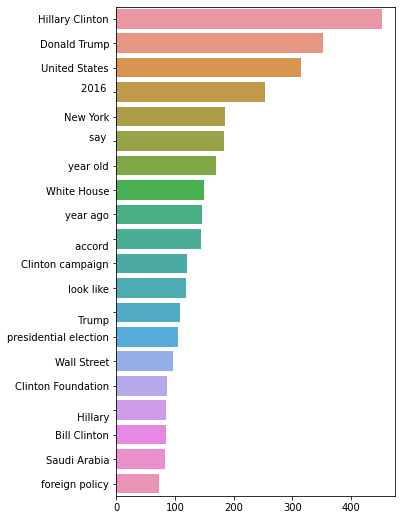

In [54]:
# Most common bigrams for negative reviews
fake_labels_tokenized= []
for i,doc in enumerate(df_processed):
  if df.iloc[i]['label']=='FAKE':
    # let's collect all valid tokens (i.e. no stop words, no punctuation) into a list
    fake_labels_tokenized.append([token.lemma_ for token in doc if not (token.is_stop or token.is_punct)])

_, fake_bigram_freq= get_top_ngram(fake_labels_tokenized, ngram_range=(2,2), top_n= 20)

# let's plot them
# separate the n_grams from their frequencies
fake_bigram_labels = [word[0].replace('\n\n\n\n','NEWLINE') for word in fake_bigram_freq]
fake_bigram_freqs = [word[1] for word in fake_bigram_freq]
plt.figure(figsize=(5,9))
sns.barplot(x=fake_bigram_freqs,y=fake_bigram_labels)


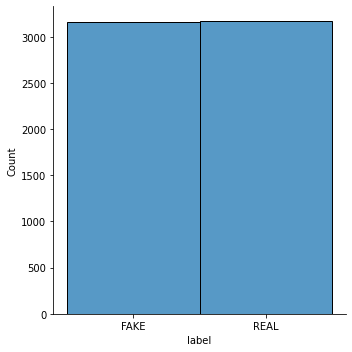

In [71]:
sns.displot(df.label)

In [73]:
sns.set_theme(style="whitegrid")

###### it can be seen here that the distribution of categories in the dependent variable's dataset is almost perfectly balanced. This could be why the classification algorithm had a high accuracy despite SMOTE or Random OverSampler wasn't used

<AxesSubplot:xlabel='label', ylabel='count'>

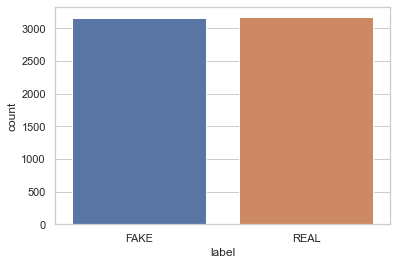

In [74]:
sns.countplot(x=df["label"])

In [11]:
df.head(20)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
5,6903,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE
6,7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE
7,95,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL
8,4869,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL
9,2909,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL


##### do some EDA for the dataset

In [12]:
labels=df.label
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [61]:
# Let's create something like a BoW model but with tfidf, with bigrams and no thresholds
df_dataset_processed_TfIdf_vectorizer = TfidfVectorizer(ngram_range=(1,3), lowercase=False, tokenizer=tokenize_as_is,
                       min_df=10, max_df=0.5).fit( df_processed_tokenized)

# how many features do we have
print(f"\n The number of features in the vocabulary is {len(df_dataset_processed_TfIdf_vectorizer.get_feature_names_out())}\n")


C:\Users\Joshua Giwa\AppData\Roaming\Python\Python38\site-packages\sklearn\feature_extraction\text.py:524: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(



 The number of features in the vocabulary is 38250



In [62]:
# fit and transform our processed and tokenized list called df_processed_tokenized using tfidf vectorizer, into our document matrix named new_dataset
new_dataset = df_dataset_processed_TfIdf_vectorizer.fit_transform(df_processed_tokenized)


In [63]:
#print the shape of our document matrix called new_dataset
type (new_dataset)
print (new_dataset.shape[1])
print (new_dataset.shape[0])


38250
6335


In [64]:
type (new_dataset)

scipy.sparse._csr.csr_matrix

In [65]:
x_train,x_test,y_train,y_test=train_test_split(new_dataset, labels, test_size=0.2, random_state=7)

In [66]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((5068, 38250), (1267, 38250), (5068,), (1267,))

In [69]:
#DataFlair - Initialize a PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(x_train,y_train)
#DataFlair - Predict on the test set and calculate accuracy
y_pred=pac.predict(x_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 98.18%


In [76]:
#DataFlair - Build confusion matrix
conf_matrix = confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])
conf_matrix


array([[619,  19],
       [  4, 625]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

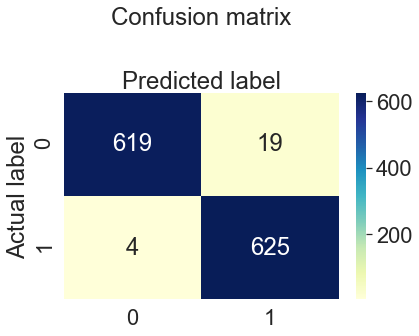

In [77]:
class_names=[0,1] # name  of classes
sns.set(font_scale = 2.0)
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(conf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
label_font = {'size': '16'}
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.3)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')